PREDICTION USING UNSUPERVISED MACHINE LEARNING- CLUSTERS FOR THE "IRIS DATASET"

Importing necessary libraries-

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

In [7]:
from sklearn.cluster import KMeans
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')


LOADING DATASET-

In [9]:
df = pd.read_csv(r'C:\Users\dell\Downloads\Iris.csv')

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


--->>PREPROCESSING DATA-

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hence, from here we can see that there are no null or missing values in our data set which indicates that there is no need to drop any column or change or fill values in any column.

--->> NOW WE WILL FIND OPTIMUM NUMBER OF CLUSTERS AND WILL PERFORM CLUSTERING OF OUR DATA

In [23]:
x = df.iloc[:, [0, 1, 2, 3]].values
def cluster(data):
    wcss = []         #wcss=within cluster sum of squares
    for i in range(1,11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=20)
      kmeans.fit(x)
      wcss.append(kmeans.inertia_)
    
    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title("Elbow graph")
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
     

USING ELBOW GRAPH WE CAN FIND OUT OPTIMUM NUMBER OF CLUSTERS

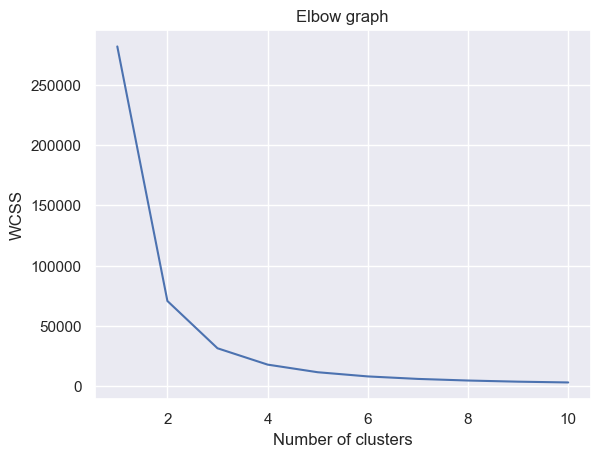

In [24]:
cluster(df)

Using elbow graph we can predict the number of clusters as follows-
The optimum number of clusters is there where the elbow occurs. Here in this graph we can clearly see that the sharp edge of elbow occurs at 3, so we can choose number of clusters as 3.

-->>NOW WE WILL APPLY K-MEANS TO OUR DATASET AND WILL CREATE KMEANS CLASSIFIER

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0) 
Y = kmeans.fit_predict(x)

WE CAN NOW PLOT GRAPHS TO VISUALIZE THE CLUSTERS

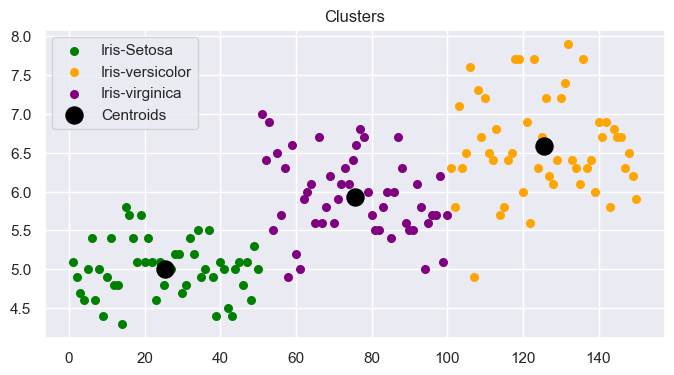

In [34]:
plt.figure(figsize=(8,4))
plt.scatter(x[Y==0,0], x[Y==0,1], s=30, c='green', label="Iris-Setosa")
plt.scatter(x[Y==1,0], x[Y==1,1], s=30, c='orange', label="Iris-versicolor")
plt.scatter(x[Y==2,0], x[Y==2,1], s=30, c='purple', label="Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c="black", marker='o', label='Centroids')
plt.title("Clusters")
plt.legend()
     

WE CAN SEE OUR DATASET CLEARLY DIVIDED INTO THREE CLUSTERS WHERE CENTROIDS ARE ALSO CLEARLY VISIBLE.

--------------------------------------------------------------------THANK YOU!!------------------------------------------------------------------